In [135]:
#Gapminder Dataset Life expectancy dataset

#Importing Packages
import pandas as pd
import numpy as np
import seaborn as sns

In [136]:
#Reading the Dataset
gapdf=pd.read_csv('gm_2008_region.csv')

In [137]:
#having the glimpse of the Dataset
gapdf.head()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality,Region
0,34811059.0,2.73,0.1,3.328945,24.59620,12314.0,129.9049,75.3,29.5,Middle East & North Africa
1,19842251.0,6.43,2.0,1.474353,22.25083,7103.0,130.1247,58.3,192.0,Sub-Saharan Africa
2,40381860.0,2.24,0.5,4.785170,27.50170,14646.0,118.8915,75.5,15.4,America
3,2975029.0,1.40,0.1,1.804106,25.35542,7383.0,132.8108,72.5,20.0,Europe & Central Asia
4,21370348.0,1.96,0.1,18.016313,27.56373,41312.0,117.3755,81.5,5.2,East Asia & Pacific


In [138]:
#Check the Shape of the Dataframe
gapdf.shape

(139, 10)

In [139]:
#Checking the info about columns
gapdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 10 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
Region             139 non-null object
dtypes: float64(9), object(1)
memory usage: 10.9+ KB


In [140]:
#Checking any null value exist in the Dataframe

gapdf.isnull().sum()

population         0
fertility          0
HIV                0
CO2                0
BMI_male           0
GDP                0
BMI_female         0
life               0
child_mortality    0
Region             0
dtype: int64

In [141]:
#Dropping the Region column as this is not giving any meaning in the analysis

gapdf=gapdf.drop('Region',axis=1)

In [142]:
#Verifying that Region is deleted or not

gapdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 139 entries, 0 to 138
Data columns (total 9 columns):
population         139 non-null float64
fertility          139 non-null float64
HIV                139 non-null float64
CO2                139 non-null float64
BMI_male           139 non-null float64
GDP                139 non-null float64
BMI_female         139 non-null float64
life               139 non-null float64
child_mortality    139 non-null float64
dtypes: float64(9)
memory usage: 9.9 KB


In [143]:
#Finding the correlation amog the features
gapdf.corr()

,population,fertility,HIV,CO2,BMI_male,GDP,BMI_female,life,child_mortality
population,1.000000,-0.061345,-0.065821,-0.010147,-0.134905,-0.045687,-0.135149,-0.005051,0.008058
fertility,-0.061345,1.000000,0.292695,-0.439747,-0.715380,-0.502615,0.527314,-0.786921,0.901704
HIV,-0.065821,0.292695,1.000000,-0.165889,-0.308700,-0.208410,0.396680,-0.604749,0.394913
CO2,-0.010147,-0.439747,-0.165889,1.000000,0.581031,0.823099,-0.280813,0.476666,-0.458186
BMI_male,-0.134905,-0.715380,-0.308700,0.581031,1.000000,0.625126,-0.447049,0.731559,-0.749691
GDP,-0.045687,-0.502615,-0.208410,0.823099,0.625126,1.000000,-0.400740,0.628999,-0.543874
BMI_female,-0.135149,0.527314,0.396680,-0.280813,-0.447049,-0.400740,1.000000,-0.658718,0.582053
life,-0.005051,-0.786921,-0.604749,0.476666,0.731559,0.628999,-0.658718,1.000000,-0.874106
child_mortality,0.008058,0.901704,0.394913,-0.458186,-0.749691,-0.543874,0.582053,-0.874106,1.000000


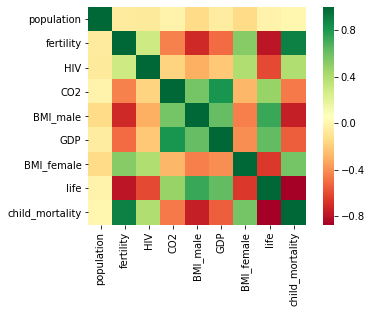

In [144]:
#Plotting the correlation Plot

sns.heatmap(gapdf.corr(), square=True, cmap='RdYlGn')

In [145]:
#Preparaing the Dataframe
X=gapdf.drop('life',axis=1)
y=gapdf['life']

In [146]:
#Importing the Linear regression Packages

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [147]:
#Splitting the Train test Data

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=42)

In [149]:
#Instantiating the Linear Regression

reg_all=LinearRegression()

In [150]:
#Training the Model on Train Data

reg_all.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
#Predicting on Test Data

y_pred=reg_all.predict(X_test)
y_pred

array([69.78523121, 71.71746546, 75.4383211 , 63.01395864, 78.52729433,
       73.34690022, 58.61797567, 74.93251615, 59.59167345, 71.84178687,
       75.75296203, 56.77224624, 61.67791787, 57.51580285, 50.76145251,
       75.0503528 , 79.60085022, 62.11294809, 75.23852216, 73.90256212,
       72.74730103, 72.3544974 , 56.81443574, 79.82333894, 85.49815049,
       73.29584958, 78.79416712, 73.18599731, 48.43946014, 74.08185763,
       73.96018103, 76.2080427 , 84.61477057, 77.189199  , 73.95404925,
       61.30019447, 72.42380546, 79.94569216, 77.17377066, 70.97949258,
       54.63782496, 61.70297809])

In [152]:
#Checking the Intercept

reg_all.intercept_

94.03778829995005

In [153]:
#Checking the Coefficient

reg_all.coef_

array([-2.03205166e-09, -3.30810286e-01, -7.21234146e-01, -1.47522293e-01,
        4.93199538e-01,  1.37767248e-04, -2.52417353e-01, -8.67212952e-02])

In [154]:
# Compute and print R^2 
#Checking the Accuracy of the Model R^2 is used in Regression Models

print("R^2: {}".format(reg_all.score(X_test, y_test)))

R^2: 0.8380468731430133


In [155]:
#Checking the RMSE

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 3.2476010800369477


In [156]:
#Cross-validation is a vital step in evaluating a model. 
##It maximizes the amount of data that is used to train the model, as during the course of training, the model is 
##not only trained, but also tested on all of the available data.

from sklearn.model_selection import cross_val_score

# Compute 5-fold cross-validation scores: cv_scores(Taking whole X and y not train or test)
cv_scores = cross_val_score(reg,X,y,cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.81720569 0.82917058 0.90214134 0.80633989 0.94495637]
Average 5-Fold CV Score: 0.859962772279345
